# 2D FFT and Convolution

### Useful functions in Python

In [55]:
#import cv2
#img = cv2 . imread ( ’ image . jp g ’ , 0 ) # Read an image as a g r a y s c a l e 2D m a t r ix
### C onv ol u t i on
#k e r n el = np . a r r a y ( [ [ 1 , 1 , 1 ] , # Example o f a s im pl e 3 x3 box f i l t e r
#[ 1 , 1 , 1 ] ,
#[ 1 , 1 , 1 ] ] )
#k e r n el /= np .sum( k e r n el ) # Good p r a c t i c e t o s c a l e your f i l t e r so
# t h e c a l c u l a t e d v a l u e s don ’ t o v e r f l o w
#conv img = cv2 . f i l t e r 2 D ( s r c=img , ddepth=−1, k e r n el=k e r n el )
# 2D C onv ol u t i on
# d de p t h o u t p u t image dep th , −1 i s same
# as i n p u t image de p t h
# k e r n e l i s a f i l t e r b u t in m a t r ix form
### Frequency f i l t e r i n g
#f = np . f f t . f f t 2 ( img ) # 2D Fas t F o u r ie r Transform
#f s h i f t = np . f f t . f f t s h i f t ( f ) # Frequency s h i f t i n g t o g e t t h e l o w e s t
# f r e q u e n c i e s i n t o t h e c e n t e r o f t h e image ,
# by d e f a u l t t h e y are in t h e c o r n e r s .
# Perform t h i s a f t e r pe r f o rm ing FFT
#magnitude spectrum = 20∗np . l o g ( np . abs ( f s h i f t ) ) # A way t o c o n v e r t t h e
# f r e q u e n c y spec trum i n t o an image
# d i s p l a y a b l e forma t . Do no t per form
# f i l t e r i n g on t h i s and do no t c o n v e r t
# t h i s back i n t o t ime domain .
#f i s h i f t = np . f f t . i f f t s h i f t ( f s h i f t ) # I n v e r s e f r e q u e n c y s h i f t , per form t h i s
# b e f o r e a p p l y i n g i n v e r s e FFT .
#img back = np . abs ( np . f f t . i f f t 2 ( f i s h i f t ) ) # I n v e r s e 2D FFT
#img back = np . c l i p ( img back , 0 , 2 5 5 ) . a s t y p e ( ’ ui n t 8 ’ )
# Un i t c o n v e r s i o n t o g e t a d i s p l a y a b l e
# image from a complex t y p e

### Frequency filtering on images

In practice the most common type of 1D signal we’ve thus far encountered has
been an audio signal. This week we will apply some of the same 1D signal
filtering techniques on 2D inputs. As 2D filtering follows most of the same
rules as 1D filtering, we will be altering the images with both Convolution and
Frequency domain filtering.
The application of Convolution on 2D inputs only has 1 large change and that
is the filter itself otherwise known as the kernel is a 2D matrix.
For frequency filtering Will revisit the FFT but instead of 1D inputs, the tasks
will be focused around 2D inputs. Luckily the most common representation for
a 2D signal is a grayscale image and they can be handled the exact same way
in the frequency domain.
An example of how 1D and 2D frequency images are similar can be seen in the
figure below.


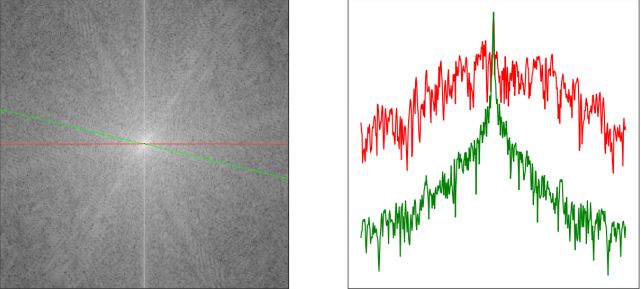

The image on the left is the frequency domain of an image and the image on
the right are the values on the two lines. Note the x-axis in the right figure goes
from high - low - high in terms of frequency. Meaning the spike in the middle
is the lowest frequency and the two edges are the highest.
Because of this, frequency filters for 2D signals need to be circular instead of
just mirrored like with 1D signals.
For further reading on image filtering in frequency domain and OpenCV:
https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html


In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

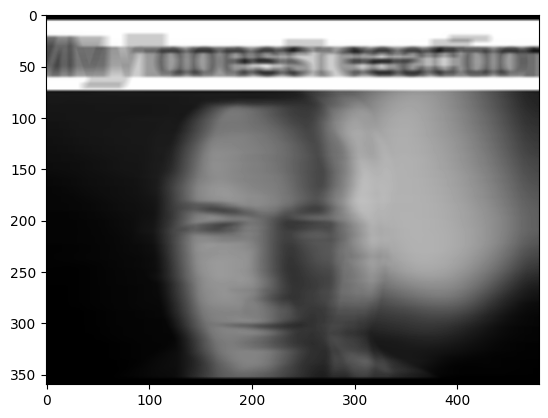

In [70]:
img = cv2.imread('reaction.jpg', 0)

N = 40
kernel = np.ones((3,N))#/ N**2
kernel /= np.sum(kernel)

conv_img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)


plt.figure()
plt.imshow(conv_img, cmap='gray')
#cv2.imshow('image', img)
#cv2.waitKey(0)
plt.show()

In [58]:
freq_img = np.fft.fft2(img)
#this is for showimg image mostly
freq_img = np.fft.fftshift(freq_img)

freq_img_display = 20*np.log(np.abs(freq_img))
freq_img_display = np.clip(freq_img_display, 0, 255)

cv2.imshow('image', freq_img_display.real.astype('uint8'))
cv2.waitKey(0)

-1

In [59]:
out_img = np.fft.ifft2(freq_img)
out_img = np.clip(out_img, 0, 255)


cv2.imshow('image', out_img.astype('uint8'))
cv2.waitKey(0)

C:\Users\Nikita\AppData\Local\Temp\ipykernel_10952\4243445375.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  cv2.imshow('image', out_img.astype('uint8'))


-1

In [60]:
def distance(x1,x2,y1,y2):
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

x_width = freq_img.shape[1]
y_height = freq_img.shape[0]

x_center = x_width/2.0
y_center = y_height/2.0

filter_kernel = np.zeros_like(freq_img)
for x in range(x_width):
    for y in range(y_height):
        dist = distance(x,x_center,y,y_center)
        filter_kernel[y,x] = (dist<150)*1

cv2.imshow('image', (filter_kernel*255).astype('uint8'))
cv2.waitKey(0)

C:\Users\Nikita\AppData\Local\Temp\ipykernel_10952\780921620.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  cv2.imshow('image', (filter_kernel*255).astype('uint8'))


-1

In [61]:
freq_img *=filter_kernel

freq_img_display = 20*np.log(np.abs(freq_img))
freq_img_display = np.clip(freq_img_display, 0, 255)

cv2.imshow('image', freq_img_display.astype('uint8'))
cv2.waitKey(0)

freq_img = np.fft.ifftshift(freq_img)
out_img = np.fft.ifft2(freq_img)

out_img = np.clip(out_img, 0, 255)
cv2.imshow('image', out_img.astype('uint8'))
cv2.waitKey(0)

C:\Users\Nikita\AppData\Local\Temp\ipykernel_10952\3525096364.py:3: RuntimeWarning: divide by zero encountered in log
  freq_img_display = 20*np.log(np.abs(freq_img))
C:\Users\Nikita\AppData\Local\Temp\ipykernel_10952\3525096364.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  cv2.imshow('image', out_img.astype('uint8'))


-1

In [67]:
def gaussian_func(X,U,s):
    G = 1/(s*(2*np.pi)**0.5) * np.exp(-0.5*((X-U)/s)**2)
    G *= s/0.4
    return G

N = 40
kernel = np.zeros((N,N))

x_width = freq_img.shape[1]
y_height = freq_img.shape[0]

x_center = x_width/2.0
y_center = y_height/2.0

filter_kernel = np.zeros_like(freq_img)
for x in range(x_width):
    for y in range(y_height):
        dist = distance(x,x_center,y,y_center)
        filter_kernel[y,x] = gaussian_func(dist,50,20)

cv2.imshow('image', (filter_kernel*255).astype('uint8'))
cv2.waitKey(0)

radius = 10
for x in range(x_width):
    for y in range(y_height):
        dist = distance(x, x_center, y, y_center)
        filter_kernel[y, x] = (dist < radius) * 1


filtered_img = cv2.filter2D(img, -1, filter_kernel)

filtered_img_display = 20*np.log(np.abs(filtered_img))
filtered_img_display = np.clip(filtered_img_display, 0, 255)

cv2.imshow('image', filtered_img_display.astype('uint8'))
cv2.waitKey(0)

freq_img = np.fft.ifftshift(freq_img)
out_img = np.fft.ifft2(freq_img)

out_img = np.clip(out_img, 0, 255)
cv2.imshow('image', out_img.astype('uint8'))
cv2.waitKey(0)

C:\Users\Nikita\AppData\Local\Temp\ipykernel_10952\1463522237.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  cv2.imshow('image', (filter_kernel*255).astype('uint8'))


error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'filter2D'
> Overload resolution failed:
>  - kernel data type = 15 is not supported
>  - Expected Ptr<cv::UMat> for argument 'kernel'


In [71]:
def distance(x1, x2, y1, y2):
    return ((x1 - x2)**2 + (y1 - y2)**2)**0.5

def gaussian_func(X, U, s):
    G = 1 / (s * (2 * np.pi)**0.5) * np.exp(-0.5 * ((X - U) / s)**2)
    G *= s / 0.4
    return G

img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Create circle filter using distance method
x_width = img.shape[1]
y_height = img.shape[0]

x_center = x_width / 2.0
y_center = y_height / 2.0

radius = 10
filter_kernel = np.zeros_like(img)
for x in range(x_width):
    for y in range(y_height):
        dist = distance(x, x_center, y, y_center)
        filter_kernel[y, x] = (dist < radius) * 1

# Apply filter using convolution
filtered_img = cv2.filter2D(img, -1, filter_kernel)

# Display filtered image
filtered_img_display = 20 * np.log(np.abs(filtered_img))
filtered_img_display = np.clip(filtered_img_display, 0, 255)

cv2.imshow('image', filtered_img_display.astype('uint8'))
cv2.waitKey(0)


AttributeError: 'NoneType' object has no attribute 'shape'

In [72]:
if img is None:
    print("Error: Image not found or cannot be read")
    exit()

# Create circle filter using distance method
x_width = img.shape[1]
y_height = img.shape[0]
x_center = x_width / 2.0
y_center = y_height / 2.0
radius = 100.0

def distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

filter_kernel = np.zeros((y_height, x_width), dtype=np.float32)
for y in range(y_height):
    for x in range(x_width):
        dist = distance(x, x_center, y, y_center)
        filter_kernel[y, x] = (dist < radius) * 1

# Convert filter to uint8
filter_kernel = (filter_kernel * 255).astype(np.uint8)

# Apply filter
filtered_img = cv2.filter2D(img, -1, np.array(filter_kernel))

# Display filtered image
cv2.imshow('image', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Error: Image not found or cannot be read


AttributeError: 'NoneType' object has no attribute 'shape'

: 

In [65]:
A = np.array([2,1,0])
B = np.array([1,0,-1])
print(np.correlate(B, A))

[2]


Both the Fourier Transform and the Spatial Domain Filtering are methods used to modify images. The Fourier Transform involves converting an image from the spatial domain to the frequency domain, allowing us to manipulate it in ways that are not possible in the spatial domain. Spatial Domain Filtering involves directly manipulating the image's pixel values to achieve a desired effect.

In 1D signals, the main difference between the two methods is that the Fourier Transform is used to isolate specific frequencies, while the Spatial Domain Filter is used to modify the signal by directly manipulating its values. In 2D signals, the Fourier Transform can be used to isolate specific frequencies in both the x and y dimensions, while the Spatial Domain Filter can be used to directly modify the pixel values of the image.

Both methods can result in image distortions if not used properly, but the Fourier Transform is more prone to creating artifacts in the image due to its use of complex numbers.